The 2023 Ironman was the 2nd triatholon I've done in my life, the first being a sprint event in rural maryland that I had not trained for (highlighted with a 400m pool swim with >50 contestants). With that in mind I had to create a training schedule. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body fat percentage data
body_fat_file = 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body fat percentage file
body_fat_file_path = base_path + body_fat_file

df_body_fat = pd.read_csv(body_fat_file_path, sep=',', skiprows=1)  # Skipping the first row (sep=)

# Print the columns to check if it’s loaded correctly
print(df_body_fat.columns)



Index(['type', 'sourceName', 'sourceVersion', 'productType', 'device',
       'startDate', 'endDate', 'unit', 'value'],
      dtype='object')


Below is a graph over 1.5 years of my bodyfat percentage, as recorded by the Renpho scale and adjacent mobile app - what we're seeing in the first half is a solid effort to get into the best shape I possibly could for the race - what we see in the second half of the graph is a solid effort to undo all of that work. 

For context we can look at my actual bodyweight as later on we'll start talking about power efforts on the bike which involve some simple maths using weight in kg.

Now looking at the lean body mass I can assuredly say I did lose muscle during this effort but that was to be expected - While I did try and maintain strength training sessions throughout the week I found it difficult to keep the weight the same as body weight dropped - brightside was that pull ups go easier over time.

In [3]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data paths
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
body_mass_file = os.path.join(base_path, 'HKQuantityTypeIdentifierBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv')
lean_body_mass_file = os.path.join(base_path, 'HKQuantityTypeIdentifierLeanBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv')
body_fat_file = os.path.join(base_path, 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv')

# Load Body Mass Data
df_body_mass = pd.read_csv(body_mass_file, sep=',', skiprows=1)
df_body_mass['date'] = pd.to_datetime(df_body_mass['startDate'])
df_body_mass_clean = df_body_mass[['date', 'value']].copy()
df_body_mass_clean.rename(columns={'value': 'Body Mass (lb)'}, inplace=True)

# Load Lean Body Mass Data
df_lean_body_mass = pd.read_csv(lean_body_mass_file, sep=',', skiprows=1)
df_lean_body_mass['date'] = pd.to_datetime(df_lean_body_mass['startDate'])
df_lean_body_mass_clean = df_lean_body_mass[['date', 'value']].copy()
df_lean_body_mass_clean.rename(columns={'value': 'Lean Body Mass (lb)'}, inplace=True)

# Load Body Fat Percentage Data
df_body_fat = pd.read_csv(body_fat_file, sep=',', skiprows=1)
df_body_fat['date'] = pd.to_datetime(df_body_fat['startDate'])
df_body_fat_clean = df_body_fat[['date', 'value']].copy()
df_body_fat_clean.rename(columns={'value': 'Body Fat Percentage (%)'}, inplace=True)

# Define important dates
training_start_date = pd.to_datetime("2022-12-01")
ironman_event_date = pd.to_datetime("2023-07-23")

# Function to add vertical lines for important events
def add_event_lines(fig):
    fig.add_vline(x=training_start_date.timestamp() * 1000, line_dash="dash", line_color="green", annotation_text="Training Start")
    fig.add_vline(x=ironman_event_date.timestamp() * 1000, line_dash="dash", line_color="green", annotation_text="Ironman Event")

### 1. Body Mass Over Time ###
fig_body_mass = px.line(df_body_mass_clean, x='date', y='Body Mass (lb)', title='Body Mass Over Time')
fig_body_mass.add_traces(px.scatter(df_body_mass_clean, x='date', y='Body Mass (lb)').data)
fig_body_mass.add_hline(y=160, line_dash="dash", line_color="red", annotation_text="Target Weight")
add_event_lines(fig_body_mass)
fig_body_mass.update_xaxes(title_text="Date")

### 2. Lean Body Mass Over Time ###
fig_lean_body_mass = px.line(df_lean_body_mass_clean, x='date', y='Lean Body Mass (lb)', title='Lean Body Mass Over Time')
fig_lean_body_mass.add_traces(px.scatter(df_lean_body_mass_clean, x='date', y='Lean Body Mass (lb)').data)
add_event_lines(fig_lean_body_mass)
fig_lean_body_mass.update_xaxes(title_text="Date")

# Add vertical rectangle on Lean Body Mass graph for Ramadan 
fig_lean_body_mass.add_vrect(
    x0=pd.to_datetime("2023-05-22").timestamp() * 1000,
    x1=pd.to_datetime("2023-04-20").timestamp() * 1000,
    fillcolor="orange", opacity=0.1, line_width=0,
    annotation_text="Ramadan", annotation_position="top left"
)

### 3. Body Fat Percentage Over Time ###
fig_body_fat = px.line(df_body_fat_clean, x='date', y='Body Fat Percentage (%)', title='Body Fat Percentage Over Time')
fig_body_fat.add_traces(px.scatter(df_body_fat_clean, x='date', y='Body Fat Percentage (%)').data)
add_event_lines(fig_body_fat)
fig_body_fat.update_xaxes(title_text="Date")

### 4. Comparison of Body Mass and Body Fat ###
fig_compare = make_subplots(specs=[[{"secondary_y": True}]])
fig_compare.add_trace(go.Scatter(x=df_body_mass_clean['date'], y=df_body_mass_clean['Body Mass (lb)'],
                                 name="Body Mass (lb)", line=dict(color='blue')), secondary_y=False)
fig_compare.add_trace(go.Scatter(x=df_body_fat_clean['date'], y=df_body_fat_clean['Body Fat Percentage (%)'],
                                 name="Body Fat Percentage (%)", line=dict(color='red')), secondary_y=True)

fig_compare.update_layout(title_text="Body Mass & Body Fat Percentage Over Time")
fig_compare.update_xaxes(title_text="Date")
fig_compare.update_yaxes(title_text="Body Mass (lb)", secondary_y=False)
fig_compare.update_yaxes(title_text="Body Fat Percentage (%)", secondary_y=True)
add_event_lines(fig_compare)

### Display all plots ###
fig_body_mass.show()
fig_lean_body_mass.show()
fig_body_fat.show()
fig_compare.show()

Check out the distribution of these heights and weights from elite athletes - I explain how the data was collected in ironman_elite_men_data_collection.ipynb - let's do a linear regression as well

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.express as px

# File path to the combined dataset
file_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/All_athletes_height_weight.csv'

# Load the dataset
df = pd.read_csv(file_path)

# 1. Normality test for height and weight (Shapiro-Wilk Test)
shapiro_height = stats.shapiro(df['Final_Height'].dropna())
shapiro_weight = stats.shapiro(df['Final_Weight'].dropna())
print(f"Shapiro-Wilk test for Height: {shapiro_height}")
print(f"Shapiro-Wilk test for Weight: {shapiro_weight}")

# 2. Correlation Coefficient (Spearman)
spearman_corr = df[['Final_Height', 'Final_Weight']].corr(method='spearman')
print("\nSpearman Correlation between Height and Weight:")
print(spearman_corr)

# Filter PRO Triathletes and Rio 2016 Olympics athletes
df_pro = df[df['Source'] == 'PRO Triathletes']
df_rio = df[df['Source'] == 'Rio 2016 Olympics']

# Drop missing values for regression
df_clean = df[['Final_Height', 'Final_Weight']].dropna()

# Reshape data for linear regression
X = df_clean['Final_Height'].values.reshape(-1, 1)
y = df_clean['Final_Weight'].values

# Create and fit the model
reg = LinearRegression()
reg.fit(X, y)

# Predicted values and confidence intervals
y_pred = reg.predict(X)
pred_std = np.std(y - y_pred)  # standard deviation of residuals
conf = 1.96 * pred_std  # 95% confidence interval

# Create Plotly figure
fig = go.Figure()

# Plot PRO Triathletes data points
fig.add_trace(go.Scatter(
    x=df_pro['Final_Height'], y=df_pro['Final_Weight'],
    mode='markers', name='PRO Triathletes',
    marker=dict(color='lightcoral', size=10, line=dict(width=1, color='black')),
    opacity=0.8
))

# Plot Rio 2016 Olympics data points
fig.add_trace(go.Scatter(
    x=df_rio['Final_Height'], y=df_rio['Final_Weight'],
    mode='markers', name='Rio 2016 Olympics',
    marker=dict(color='turquoise', size=10, line=dict(width=1, color='black')),
    opacity=0.8
))

# Plot the regression line
fig.add_trace(go.Scatter(
    x=df_clean['Final_Height'], y=y_pred,
    mode='lines', name=f'Regression Line (R²={reg.score(X, y):.2f})',
    line=dict(color='#E63946', width=3, dash='dash')
))

# Plot confidence interval lines
fig.add_trace(go.Scatter(
    x=df_clean['Final_Height'], y=y_pred - conf,
    mode='lines', name='95% Confidence Interval',
    line=dict(color='green', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=df_clean['Final_Height'], y=y_pred + conf,
    mode='lines', showlegend=False,
    line=dict(color='green', width=2, dash='dash')
))

# Customize plot layout
fig.update_layout(
    title='Height vs. Weight with Linear Regression & Confidence Intervals',
    xaxis_title='Height (meters)',
    yaxis_title='Weight (kg)',
    plot_bgcolor='#f1faee',
    font=dict(size=14, color='#1D3557'),
    legend=dict(x=0.05, y=0.95),
)

# Show the plot
fig.show()

# 4. Z-Scores for Height and Weight (detecting outliers)
df['Height_ZScore'] = np.abs(stats.zscore(df['Final_Height'].dropna()))
df['Weight_ZScore'] = np.abs(stats.zscore(df['Final_Weight'].dropna()))

# Filter athletes with z-scores above 3 (outliers)
outliers = df[(df['Height_ZScore'] > 3) | (df['Weight_ZScore'] > 3)]
print("\nOutliers in Height or Weight (Z-Scores > 3):")
print(outliers[['name', 'Final_Height', 'Final_Weight', 'Height_ZScore', 'Weight_ZScore']])

# 5. Summary statistics
height_summary = df['Final_Height'].describe()
weight_summary = df['Final_Weight'].describe()

print("\nHeight Summary Statistics:")
print(height_summary)

print("\nWeight Summary Statistics:")
print(weight_summary)

# Visualizing height and weight distributions using Plotly
# Create histogram with density line for Height
fig_hist_height = go.Figure()

# Add the histogram for Height
fig_hist_height.add_trace(go.Histogram(
    x=df['Final_Height'],
    nbinsx=10,
    histnorm='probability density',
    name='Height Distribution',
    marker=dict(color='#457B9D', line=dict(width=1, color='black')),
    opacity=0.75
))

# Add the KDE line for Height
height_density = stats.gaussian_kde(df['Final_Height'].dropna())
height_x = np.linspace(df['Final_Height'].min(), df['Final_Height'].max(), 100)
fig_hist_height.add_trace(go.Scatter(
    x=height_x,
    y=height_density(height_x),
    mode='lines',
    name='Density',
    line=dict(color='#1D3557', width=3)
))

# Customize layout
fig_hist_height.update_layout(
    title='Height Distribution with Density Line',
    xaxis_title="Height (meters)",
    yaxis_title="Density",
    plot_bgcolor='#f1faee',
    font=dict(size=14, color='#1D3557'),
    showlegend=True
)

fig_hist_height.show()

# Create histogram with density line for Weight
fig_hist_weight = go.Figure()

# Add the histogram for Weight
fig_hist_weight.add_trace(go.Histogram(
    x=df['Final_Weight'],
    nbinsx=10,
    histnorm='probability density',
    name='Weight Distribution',
    marker=dict(color='#E63946', line=dict(width=1, color='black')),
    opacity=0.75
))

# Add the KDE line for Weight
weight_density = stats.gaussian_kde(df['Final_Weight'].dropna())
weight_x = np.linspace(df['Final_Weight'].min(), df['Final_Weight'].max(), 100)
fig_hist_weight.add_trace(go.Scatter(
    x=weight_x,
    y=weight_density(weight_x),
    mode='lines',
    name='Density',
    line=dict(color='#1D3557', width=3)
))

# Customize layout
fig_hist_weight.update_layout(
    title='Weight Distribution with Density Line',
    xaxis_title="Weight (kg)",
    yaxis_title="Density",
    plot_bgcolor='#f1faee',
    font=dict(size=14, color='#1D3557'),
    showlegend=True
)

fig_hist_weight.show()

Shapiro-Wilk test for Height: ShapiroResult(statistic=0.9930936548203755, pvalue=0.2543388182632122)
Shapiro-Wilk test for Weight: ShapiroResult(statistic=0.9844437965790299, pvalue=0.0102788317954962)

Spearman Correlation between Height and Weight:
              Final_Height  Final_Weight
Final_Height      1.000000      0.751136
Final_Weight      0.751136      1.000000



Outliers in Height or Weight (Z-Scores > 3):
Empty DataFrame
Columns: [name, Final_Height, Final_Weight, Height_ZScore, Weight_ZScore]
Index: []

Height Summary Statistics:
count    267.000000
mean       1.808502
std        0.063471
min        1.660000
25%        1.760000
50%        1.810000
75%        1.850000
max        1.980000
Name: Final_Height, dtype: float64

Weight Summary Statistics:
count    239.000000
mean      70.108787
std        5.485340
min       56.000000
25%       66.000000
50%       70.000000
75%       74.000000
max       82.000000
Name: Final_Weight, dtype: float64


Alright now that we have this let's find out what my ideal weight is at 178cm (1.78m)

In [5]:
# Your height in meters
your_height = 1.78

# Predict your ideal weight based on the linear regression model
your_ideal_weight = reg.predict([[your_height]])

print(f"Based on the linear regression, ideal weight is approximately {your_ideal_weight[0]:.2f} kg.")


Based on the linear regression, ideal weight is approximately 68.36 kg.


68.36kg (150.71 pounds) is pretty light, this would likely put me at sub 10% bodyfat, I would say on race day I was about ~159 - Good now that I know ideal body weight let's go into a heart rate analysis - a very important factor towards endurance events 

In [6]:
import os
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# List of activity files and their corresponding activity labels
activity_files = {
    'HKWorkoutActivityTypeBasketball_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Basketball',
    'HKWorkoutActivityTypeCycling_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Cycling',
    'HKWorkoutActivityTypeFunctionalStrengthTraining_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Functional Strength Training',
    'HKWorkoutActivityTypeRunning_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Running',
    'HKWorkoutActivityTypeSwimming_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Swimming',
    'HKWorkoutActivityTypeTraditionalStrengthTraining_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Traditional Strength Training',
    'HKWorkoutActivityTypeWalking_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Walking',
    'HKWorkoutActivityTypeYoga_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Yoga'
}

# Load the heart rate data
df_heart_rate = pd.read_csv(os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRate_2024-04-99_18-31-28_SimpleHealthExportCSV.csv'), sep=',', skiprows=1)

# Round the startDate to the nearest minute to allow for fuzzy merging
df_heart_rate['startDate'] = pd.to_datetime(df_heart_rate['startDate']).dt.round('min')

# Initialize an empty DataFrame to store merged data
df_all = pd.DataFrame()

# Loop through each activity file and merge with heart rate data
for file_name, activity_type in activity_files.items():
    file_path = os.path.join(base_path, file_name)
    df_activity = pd.read_csv(file_path, sep=',', skiprows=1)
    df_activity['startDate'] = pd.to_datetime(df_activity['startDate']).dt.round('min')  # Round activity start times too
    df_activity['activityType'] = activity_type
    df_merged = pd.merge(df_heart_rate, df_activity[['startDate', 'activityType']], on='startDate', how='inner')
    df_all = pd.concat([df_all, df_merged])

# Create the box plot with jitter (points="all" adds jitter to scatter points)
fig = px.box(df_all, x='activityType', y='value', points="all",  # points="all" adds jitter to scatter points
             title='Heart Rate vs Activity Type', 
             labels={'value': 'Heart Rate (BPM)', 'activityType': 'Activity Type'},
             color='activityType')  # Use the same color for the box plot and points for each activity

# Customize the layout
fig.update_traces(marker=dict(size=6, opacity=0.6))  # Set size and opacity of scatter points
fig.update_layout(
    plot_bgcolor='#f1faee',  # Set background color
    paper_bgcolor='#f1faee',  # Paper (overall background)
    title_font=dict(size=24, color='#1D3557'),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(gridcolor='#A8DADC'),  # Gridline color
    yaxis=dict(gridcolor='#A8DADC'),  # Gridline color for y-axis
    font=dict(color='#457B9D'),  # Font color for axes
    xaxis_title='Activity Type',
    yaxis_title='Heart Rate (BPM)',
    showlegend=False  # Remove redundant legend
)

# Show the plot
fig.show()



This inspects the heart rate zones I used most often - there are multiple ways to calcualte the zones here are two methods

In [7]:
import os
import pandas as pd
import plotly.express as px

# Clean the data to focus on relevant columns
df_heart_rate_clean = df_heart_rate[['startDate', 'value']].copy()

# Convert 'startDate' to datetime format and ensure it's timezone naive
df_heart_rate_clean['startDate'] = pd.to_datetime(df_heart_rate_clean['startDate']).dt.tz_localize(None)

# Define Ironman training period (as timezone naive)
training_start_date = pd.to_datetime("2022-12-01").tz_localize(None)
ironman_event_date = pd.to_datetime("2023-07-23").tz_localize(None)

# Filter data for Ironman training period
df_heart_rate_clean = df_heart_rate_clean[(df_heart_rate_clean['startDate'] >= training_start_date) & 
                                          (df_heart_rate_clean['startDate'] <= ironman_event_date)]

# Define age and resting heart rate (RHR)
age = 27  # Your age
RHR = 58  # Resting heart rate

# Max Heart Rate (MHR) calculation
MHR = 220 - age

# Intensity levels for heart rate zones (as percentages)
intensity_levels = [0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate target heart rate zones using Max Heart Rate Equation
thr_mhr = [MHR * intensity for intensity in intensity_levels]

# Calculate target heart rate zones using Karvonen Formula
thr_karvonen = [(MHR - RHR) * intensity + RHR for intensity in intensity_levels]

# Adding the MHR to close the ranges for both methods (remove MHR from thr_mhr and thr_karvonen)
thr_mhr = [0] + thr_mhr  # Starting from 0 (5 bins for 5 labels)
thr_karvonen = [0] + thr_karvonen  # Starting from 0 (5 bins for 5 labels)

# Ensure that the number of bins is correct: there should be 6 bins for 5 labels
if len(thr_mhr) == 6 and len(thr_karvonen) == 6:
    print("Number of bins is correct.")
    
    # Assign heart rate zones using Max Heart Rate (MHR) method
    df_heart_rate_clean['zone_MHR'] = pd.cut(df_heart_rate_clean['value'], 
                                             bins=thr_mhr, 
                                             labels=['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 
                                                     'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)'],
                                             include_lowest=True)

    # Assign heart rate zones using Karvonen method
    df_heart_rate_clean['zone_Karvonen'] = pd.cut(df_heart_rate_clean['value'], 
                                                  bins=thr_karvonen, 
                                                  labels=['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 
                                                          'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)'],
                                                  include_lowest=True)

    # Sorting the categories to ensure proper ordering for the visualizations (Zone 2 before Zone 3)
    zone_order = ['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)']
    
    # Sort the categories explicitly
    df_heart_rate_clean['zone_MHR'] = pd.Categorical(df_heart_rate_clean['zone_MHR'], categories=zone_order, ordered=True)
    df_heart_rate_clean['zone_Karvonen'] = pd.Categorical(df_heart_rate_clean['zone_Karvonen'], categories=zone_order, ordered=True)

    # Correct color mapping and explicitly assign to each zone
    color_mapping = {'Zone 1 (50%-60%)': '#e63946', 'Zone 2 (60%-70%)': '#a8dadc', 
                     'Zone 3 (70%-80%)': '#90EE90', 'Zone 4 (80%-90%)': '#457b9d', 'Zone 5 (90%-100%)': '#1d3557'}

else:
    print("Error: Mismatch between the number of bins and labels.")
    print(f"thr_mhr: {len(thr_mhr)} bins, thr_karvonen: {len(thr_karvonen)} bins")

# Visualization of heart rate zones using MHR method with corrected zone order and color mapping
if 'zone_MHR' in df_heart_rate_clean.columns:
    fig = px.histogram(df_heart_rate_clean, x='zone_MHR', title='Time Spent in Heart Rate Zones During Ironman Training (MHR Method)',
                       labels={'zone_MHR': 'Heart Rate Zone (MHR)', 'count': 'Time (data points)'},
                       color='zone_MHR',  # Use the heart rate zone as the color category
                       category_orders={"zone_MHR": zone_order},  # Explicitly define the order of categories
                       color_discrete_map=color_mapping)
    fig.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
    fig.show()

# Visualization of heart rate zones using Karvonen method with corrected zone order and color mapping
if 'zone_Karvonen' in df_heart_rate_clean.columns:
    fig_karvonen = px.histogram(df_heart_rate_clean, x='zone_Karvonen', title='Time Spent in Heart Rate Zones During Ironman Training (Karvonen Method)',
                                labels={'zone_Karvonen': 'Heart Rate Zone (Karvonen)', 'count': 'Time (data points)'},
                                color='zone_Karvonen',  # Use the heart rate zone as the color category
                                category_orders={"zone_Karvonen": zone_order},  # Explicitly define the order of categories
                                color_discrete_map=color_mapping)
    fig_karvonen.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
    fig_karvonen.show()

### Daily Time Spent in All Heart Rate Zones ###
# Calculate daily time spent in all heart rate zones
time_spent_in_zones_daily = df_heart_rate_clean.groupby([df_heart_rate_clean['startDate'].dt.date, 'zone_Karvonen']).size().unstack(fill_value=0)

# Reset index to have 'startDate' as a column for easier plotting
time_spent_in_zones_daily = time_spent_in_zones_daily.reset_index()

# Plot daily time spent in all heart rate zones with explicit colors, stacked by zone
fig_time_spent_all_zones = px.bar(
    time_spent_in_zones_daily, 
    x='startDate', 
    y=['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)'], 
    barmode='stack', 
    title='Daily Time Spent in Heart Rate Zones During Ironman Training',
    labels={'startDate': 'Date', 'value': 'Time Spent (data points)'},
    color_discrete_map=color_mapping  # Apply the color scheme
)
# Enable zooming and panning
fig_time_spent_all_zones.update_layout(dragmode='zoom')

# Add interactive slider for zooming in and out
fig_time_spent_all_zones.update_xaxes(rangeslider_visible=True)

# Show the updated interactive graph
fig_time_spent_all_zones.show()

Number of bins is correct.


/var/folders/_w/k9b4brpx7hlfjm6btrrr148r0000gn/T/ipykernel_17086/2998252986.py:94: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Interestingly enough I put my max zone 2 during training as 155 bpm - I think I left alot on the table aerobically - to be sure let's do some donut plots to see time spent in each zone 

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df_heart_rate_clean is already defined and contains the filtered data for the Ironman training period

# Define the color mapping and zone order
color_mapping = {
    'Zone 1 (50%-60%)': '#e63946',
    'Zone 2 (60%-70%)': '#a8dadc',
    'Zone 3 (70%-80%)': '#90EE90',
    'Zone 4 (80%-90%)': '#457b9d',
    'Zone 5 (90%-100%)': '#1d3557'
}
zone_order = ['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)']

# Calculate percentages for MHR and Karvonen methods
zone_mhr_counts = df_heart_rate_clean['zone_MHR'].value_counts().reindex(zone_order).fillna(0)
zone_mhr_percentage = (zone_mhr_counts / zone_mhr_counts.sum()) * 100

zone_karvonen_counts = df_heart_rate_clean['zone_Karvonen'].value_counts().reindex(zone_order).fillna(0)
zone_karvonen_percentage = (zone_karvonen_counts / zone_karvonen_counts.sum()) * 100

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('MHR Method', 'Karvonen Method'))

# Function to create custom text
def custom_text(labels, values):
    return [f'{l.split()[1]}' if v >= 3 else '' for l, v in zip(labels, values)]

# Add traces for MHR method
fig.add_trace(go.Pie(labels=zone_order, values=zone_mhr_percentage.values,
                     name="MHR Method", hole=.4, marker_colors=[color_mapping[zone] for zone in zone_order],
                     textinfo='text', hoverinfo='label+percent+value',
                     textfont_size=12, textposition='inside', 
                     text=custom_text(zone_order, zone_mhr_percentage.values),
                     sort=False), 1, 1)

# Add traces for Karvonen method
fig.add_trace(go.Pie(labels=zone_order, values=zone_karvonen_percentage.values,
                     name="Karvonen Method", hole=.4, marker_colors=[color_mapping[zone] for zone in zone_order],
                     textinfo='text', hoverinfo='label+percent+value', 
                     textfont_size=12, textposition='inside', 
                     text=custom_text(zone_order, zone_karvonen_percentage.values),
                     sort=False), 1, 2)

# Update layout
fig.update_layout(
    title_text="Percentage of Time Spent in Heart Rate Zone During Training",
    annotations=[dict(text='MHR Method', x=0.22, y=1, font_size=16, showarrow=False),
                 dict(text='Karvonen Method', x=0.77, y=1, font_size=16, showarrow=False)],
    height=600,
    width=1000,
    legend_title="Heart Rate Zones",
    legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5, traceorder='normal'),
    hoverlabel=dict(bgcolor="white", font_size=14),
    plot_bgcolor='#f1faee',
    paper_bgcolor='#f1faee',
    font=dict(size=14)
)

# Add custom hover template
for trace in fig.data:
    trace.hovertemplate = '%{label}<br>Time: %{value:.1f}%<extra></extra>'

fig.show()

In the future I will increase my zone two based on the Karvonen method 

In [9]:
import os
import pandas as pd
import numpy as np
import plotly.express as px

# Load HRV data
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
hrv_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv')
df_hrv = pd.read_csv(hrv_file, sep=',', skiprows=1)

# Clean the data to focus on relevant columns
df_hrv_clean = df_hrv[['startDate', 'value']].copy()

# Convert 'startDate' to datetime format
df_hrv_clean['startDate'] = pd.to_datetime(df_hrv_clean['startDate'])

# Extract NN intervals (HRV values)
nn_intervals = df_hrv_clean['value'].values

# Calculate SDNN (Standard Deviation of NN intervals)
sdnn = np.std(nn_intervals)
print(f'SDNN: {sdnn:.2f} ms')

# Calculate RMSSD (Root Mean Square of Successive Differences)
rmssd = np.sqrt(np.mean(np.diff(nn_intervals) ** 2))
print(f'RMSSD: {rmssd:.2f} ms')

# Calculate pNN50 (Percentage of successive NN intervals > 50 ms)
nn_diff = np.diff(nn_intervals)
pnn50 = np.sum(np.abs(nn_diff) > 50) / len(nn_diff) * 100
print(f'pNN50: {pnn50:.2f} %')

# Plot HRV trend (7-day rolling average)
df_hrv_clean['HRV_rolling'] = df_hrv_clean['value'].rolling(window=7).mean()

# Define training period
training_start_date = pd.to_datetime("2022-12-01")
ironman_event_date = pd.to_datetime("2023-07-23")

# Create the plot
fig = px.line(df_hrv_clean, x='startDate', y='HRV_rolling', title='HRV Trend Over Time', markers=True)

# Add vertical lines for training start and Ironman event
fig.add_vline(x=training_start_date.timestamp() * 1000, line_dash="dash", line_color="green", annotation_text="Training Start")
fig.add_vline(x=ironman_event_date.timestamp() * 1000, line_dash="dash", line_color="green", annotation_text="Ironman Event")

# Highlight the training period
fig.add_vrect(
    x0=training_start_date.timestamp() * 1000,
    x1=ironman_event_date.timestamp() * 1000,
    fillcolor="LightGreen",
    opacity=0.2,
    layer="below",
    line_width=0,
)
# Calculate trend line using linear regression
X = np.array((df_hrv_clean['startDate'] - df_hrv_clean['startDate'].min()).dt.days).reshape(-1, 1)  # Days since the first date
y = df_hrv_clean['HRV_rolling'].values

# Filter out NaN values in the rolling data (necessary for linear regression)
valid_indices = ~np.isnan(y)
X = X[valid_indices]
y = y[valid_indices]

# Linear regression model
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Add the trend line (dashed red)
fig.add_trace(go.Scatter(
    x=df_hrv_clean['startDate'][valid_indices],  # X-axis as datetime
    y=y_pred,
    mode='lines',
    name='Trend Line',
    line=dict(color='red', width=3, dash='dash')  # Dashed red line
))

# Update layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="HRV (ms) - 7-day Rolling Average",
    hovermode="x unified",
    font=dict(size=14),
    plot_bgcolor='#f1faee'
)

# Add hover template
fig.update_traces(hovertemplate='Date: %{x|%Y-%m-%d}<br>HRV: %{y:.2f} ms<extra></extra>')

# Show the updated interactive graph
fig.show()

SDNN: 38.37 ms
RMSSD: 51.83 ms
pNN50: 29.52 %


Poincaré Analysis - SD1: 34.02 ms, SD2: 38.10 ms


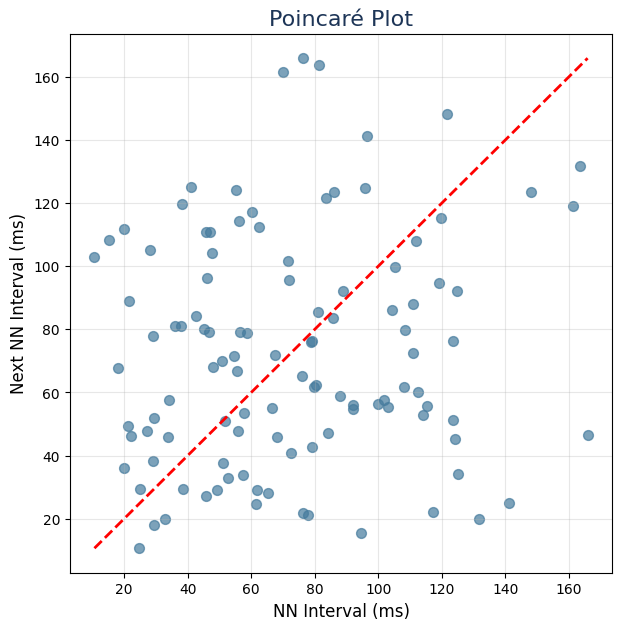

Approximate Entropy (ApEn): 0.6572
Frequency-Domain Analysis - LF: 317.05, HF: 5142.41, LF/HF Ratio: 0.06


In [10]:
import numpy as np
import pandas as pd
from scipy.signal import welch
import plotly.express as px
import matplotlib.pyplot as plt
import os

# Define important dates (make sure they are timezone-naive)
training_start_date = pd.to_datetime("2022-12-01").tz_localize(None)
ironman_event_date = pd.to_datetime("2023-07-23").tz_localize(None)

# Load HRV data
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
hrv_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv')
df_hrv = pd.read_csv(hrv_file, sep=',', skiprows=1)

# Clean HRV data and ensure all datetime columns are timezone-naive
df_hrv['startDate'] = pd.to_datetime(df_hrv['startDate']).dt.tz_localize(None)
df_hrv_clean = df_hrv[(df_hrv['startDate'] >= training_start_date) & (df_hrv['startDate'] <= ironman_event_date)].copy()
df_hrv_clean.rename(columns={'value': 'HRV'}, inplace=True)

# Extract NN intervals for HRV analysis
nn_intervals = df_hrv_clean['HRV'].values

### 1. Poincaré Analysis (SD1/SD2)
def poincare_analysis(nn_intervals):
    diff_nn = np.diff(nn_intervals)
    sd1 = np.sqrt(np.var(diff_nn) / 2)
    sd2 = np.sqrt(2 * np.var(nn_intervals) - 0.5 * np.var(diff_nn))
    return sd1, sd2

# Poincaré Plot with enhanced aesthetics
def plot_poincare(nn_intervals):
    x = nn_intervals[:-1]
    y = nn_intervals[1:]
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, color='#457b9d', alpha=.7, s=50)  # Adjust point size
    plt.plot([min(x), max(x)], [min(x), max(x)], color='red', linewidth=2, linestyle="--")  # Line of identity
    plt.title('Poincaré Plot', fontsize=16, color='#1d3557')
    plt.xlabel('NN Interval (ms)', fontsize=12)
    plt.ylabel('Next NN Interval (ms)', fontsize=12)
    plt.grid(True, alpha=0.3)  # Light grid for improved readability
    plt.show()

sd1, sd2 = poincare_analysis(nn_intervals)
print(f"Poincaré Analysis - SD1: {sd1:.2f} ms, SD2: {sd2:.2f} ms")

# Plot Poincaré plot
plot_poincare(nn_intervals)

### 2. Approximate Entropy (ApEn)
def approximate_entropy(U, m, r):
    N = len(U)
    def _phi(m):
        x = np.array([U[i:i + m] for i in range(N - m + 1)])
        C = np.sum(np.max(np.abs(x[:, None] - x[None, :]), axis=2) <= r, axis=0) / (N - m + 1)
        return np.sum(np.log(C)) / (N - m + 1)
    return abs(_phi(m) - _phi(m + 1))

ap_en = approximate_entropy(nn_intervals, 2, 0.2 * np.std(nn_intervals))
print(f"Approximate Entropy (ApEn): {ap_en:.4f}")

### 3. Frequency-Domain Analysis (LF, HF, LF/HF Ratio)
def frequency_domain_analysis(nn_intervals, fs=4):
    f, Pxx = welch(nn_intervals, fs=fs, nperseg=min(len(nn_intervals), 128))  # Adjust nperseg
    lf_band = np.trapz(Pxx[(f >= 0.04) & (f <= 0.15)])  # LF band
    hf_band = np.trapz(Pxx[(f >= 0.15) & (f <= 0.40)])  # HF band
    lf_hf_ratio = lf_band / hf_band if hf_band != 0 else np.nan
    return lf_band, hf_band, lf_hf_ratio

lf, hf, lf_hf = frequency_domain_analysis(nn_intervals)
print(f"Frequency-Domain Analysis - LF: {lf:.2f}, HF: {hf:.2f}, LF/HF Ratio: {lf_hf:.2f}")


In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Load VO2 Max data
df_vo2_clean = pd.read_csv('/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/HKQuantityTypeIdentifierVO2Max_2024-04-99_18-31-27_SimpleHealthExportCSV.csv', skiprows=1)
df_vo2_clean['startDate'] = pd.to_datetime(df_vo2_clean['startDate'])
df_vo2_clean.rename(columns={'startDate': 'date', 'value': 'vo2_max'}, inplace=True)

# Ensure all dates are tz-naive for compatibility with Plotly
df_vo2_clean['date'] = df_vo2_clean['date'].dt.tz_localize(None)

# Define important dates
training_start_date = pd.Timestamp("2022-12-01").tz_localize(None)
ironman_event_date = pd.Timestamp("2023-07-23").tz_localize(None)

# Calculate Summary Statistics
mean_vo2_max = df_vo2_clean['vo2_max'].mean()
median_vo2_max = df_vo2_clean['vo2_max'].median()
std_vo2_max = df_vo2_clean['vo2_max'].std()
min_vo2_max = df_vo2_clean['vo2_max'].min()
max_vo2_max = df_vo2_clean['vo2_max'].max()

# Linear regression to get the trend line
x = (df_vo2_clean['date'] - df_vo2_clean['date'].min()).dt.days.values
y = df_vo2_clean['vo2_max'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Trend Line
trend_line = intercept + slope * x

# Enhanced VO2 Max Trend Analysis with vertical lines for events
def enhanced_vo2_max_trend(df):
    fig = go.Figure()

    # VO2 Max data points
    fig.add_trace(go.Scatter(x=df['date'], y=y, mode='markers+lines', name='VO2 Max',
                            marker=dict(color='#457b9d', size=6),  # Reduced marker size
                            line=dict(color='#457b9d', width=2)))  # Line color and size to match second plot

    # Trend line (Dashed Red)
    fig.add_trace(go.Scatter(x=df['date'], y=trend_line, mode='lines', name='Trend Line',
                            line=dict(color='red', width=3, dash='dash')))  # Updated to dashed line

    # Add vertical lines for training start and Ironman event dates
    fig.add_shape(type="line", x0=training_start_date, x1=training_start_date, y0=min(y), y1=max(y),
              line=dict(color="green", dash="dash"), xref="x", yref="y")
    fig.add_annotation(x=training_start_date, y=max(y)+0.5, text="Training Start", showarrow=False)

    fig.add_shape(type="line", x0=ironman_event_date, x1=ironman_event_date, y0=min(y), y1=max(y),
              line=dict(color="green", dash="dash"), xref="x", yref="y")
    fig.add_annotation(x=ironman_event_date, y=max(y)+0.5, text="Ironman Event", showarrow=False)

    # Customize layout to match second image style
    fig.update_layout(
        title='VO2 Max Over Time',
        xaxis_title='Date',
        yaxis_title='VO2 Max (mL/min·kg)',
        plot_bgcolor='#f1faee',  # Set to light blue to match second plot
        paper_bgcolor='#f1faee',
        font=dict(size=14, color='#1d3557'),
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='#ffffff'),  # Lightened grid color
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#ffffff')
    )

    fig.show()

# Call the function with your clean data
enhanced_vo2_max_trend(df_vo2_clean)

# Print summary statistics
print(f"Summary Statistics:")
print(f"Mean VO2 Max: {mean_vo2_max:.2f} mL/min·kg")
print(f"Median VO2 Max: {median_vo2_max:.2f} mL/min·kg")
print(f"Standard Deviation: {std_vo2_max:.2f}")
print(f"Lowest VO2 Max: {min_vo2_max:.2f} mL/min·kg")
print(f"Highest VO2 Max: {max_vo2_max:.2f} mL/min·kg")
print(f"Trend Line Slope (Rate of Improvement): {slope:.5f} VO2 Max/day")


Summary Statistics:
Mean VO2 Max: 53.53 mL/min·kg
Median VO2 Max: 54.45 mL/min·kg
Standard Deviation: 2.19
Lowest VO2 Max: 48.88 mL/min·kg
Highest VO2 Max: 56.81 mL/min·kg
Trend Line Slope (Rate of Improvement): -0.00253 VO2 Max/day


In [12]:
import os

# Directory to save the visualizations
save_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/visualizations/'

# Check if the save path exists, if not create it
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save all the figures (replace fig_name with the actual figure variable names)
fig_body_mass.write_image(os.path.join(save_path, 'body_mass_over_time.png'))
fig_lean_body_mass.write_image(os.path.join(save_path, 'lean_body_mass_over_time.png'))
fig_body_fat.write_image(os.path.join(save_path, 'body_fat_percentage_over_time.png'))
fig_compare.write_image(os.path.join(save_path, 'body_mass_and_fat_comparison.png'))
fig.show()

# Save other visualizations from further sections of the code
fig_hist_height.write_image(os.path.join(save_path, 'height_distribution.png'))
fig_hist_weight.write_image(os.path.join(save_path, 'weight_distribution.png'))
fig.write_image(os.path.join(save_path, 'regression_height_weight.png'))

# Save Heart Rate visualizations
fig_time_spent_all_zones.write_image(os.path.join(save_path, 'heart_rate_zones_time_spent.png'))
fig_karvonen.write_image(os.path.join(save_path, 'heart_rate_zones_karvonen_method.png'))
fig.show()

# Save VO2 Max visualization
fig.write_image(os.path.join(save_path, 'vo2_max_trend.png'))

print("All visualizations saved to", save_path)


All visualizations saved to /Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/visualizations/


In [15]:
import os

# Directory to save the visualizations
save_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/visualizations/'

# Check if the save path exists, if not create it
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save all the figures as both .png and .html
fig_body_mass.write_image(os.path.join(save_path, 'body_mass_over_time.png'))
fig_body_mass.write_html(os.path.join(save_path, 'body_mass_over_time.html'))

fig_lean_body_mass.write_image(os.path.join(save_path, 'lean_body_mass_over_time.png'))
fig_lean_body_mass.write_html(os.path.join(save_path, 'lean_body_mass_over_time.html'))

fig_body_fat.write_image(os.path.join(save_path, 'body_fat_percentage_over_time.png'))
fig_body_fat.write_html(os.path.join(save_path, 'body_fat_percentage_over_time.html'))

fig_compare.write_image(os.path.join(save_path, 'body_mass_and_fat_comparison.png'))
fig_compare.write_html(os.path.join(save_path, 'body_mass_and_fat_comparison.html'))

# Save other visualizations from further sections of the code
fig_hist_height.write_image(os.path.join(save_path, 'height_distribution.png'))
fig_hist_height.write_html(os.path.join(save_path, 'height_distribution.html'))

fig_hist_weight.write_image(os.path.join(save_path, 'weight_distribution.png'))
fig_hist_weight.write_html(os.path.join(save_path, 'weight_distribution.html'))

fig.write_image(os.path.join(save_path, 'regression_height_weight.png'))
fig.write_html(os.path.join(save_path, 'regression_height_weight.html'))

# Save Heart Rate visualizations
fig_time_spent_all_zones.write_image(os.path.join(save_path, 'heart_rate_zones_time_spent.png'))
fig_time_spent_all_zones.write_html(os.path.join(save_path, 'heart_rate_zones_time_spent.html'))

fig_karvonen.write_image(os.path.join(save_path, 'heart_rate_zones_karvonen_method.png'))
fig_karvonen.write_html(os.path.join(save_path, 'heart_rate_zones_karvonen_method.html'))

# Save VO2 Max visualization
fig.write_image(os.path.join(save_path, 'vo2_max_trend.png'))
fig.write_html(os.path.join(save_path, 'vo2_max_trend.html'))

print("All visualizations saved to", save_path)


All visualizations saved to /Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/visualizations/


In [14]:
import os

# Updated file path for saving the summary statistics
stats_save_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/summary_stats/'

# Check if the summary stats folder exists, if not create it
if not os.path.exists(stats_save_path):
    os.makedirs(stats_save_path)

### Option 1: Save Summary Stats in a Text File ###
def save_summary_statistics_text():
    text_file_path = os.path.join(stats_save_path, 'summary_statistics.txt')
    with open(text_file_path, 'w') as f:
        f.write("### VO2 Max Summary Statistics ###\n")
        f.write(f"Mean VO2 Max: {mean_vo2_max:.2f} mL/min·kg\n")
        f.write(f"Median VO2 Max: {median_vo2_max:.2f} mL/min·kg\n")
        f.write(f"Standard Deviation: {std_vo2_max:.2f}\n")
        f.write(f"Lowest VO2 Max: {min_vo2_max:.2f} mL/min·kg\n")
        f.write(f"Highest VO2 Max: {max_vo2_max:.2f} mL/min·kg\n")
        f.write(f"Trend Line Slope (Rate of Improvement): {slope:.5f} VO2 Max/day\n\n")

        f.write("### Height and Weight Summary Statistics ###\n")
        f.write(f"\nHeight Summary Statistics:\n{height_summary}\n")
        f.write(f"\nWeight Summary Statistics:\n{weight_summary}\n")

        f.write("\n### Heart Rate Variability (HRV) Summary ###\n")
        f.write(f"SDNN: {sdnn:.2f} ms\n")
        f.write(f"RMSSD: {rmssd:.2f} ms\n")
        f.write(f"pNN50: {pnn50:.2f} %\n")

        f.write("\n### Frequency-Domain Analysis (LF/HF Ratio) ###\n")
        f.write(f"Low Frequency (LF): {lf:.2f}\n")
        f.write(f"High Frequency (HF): {hf:.2f}\n")
        f.write(f"LF/HF Ratio: {lf_hf:.2f}\n")

    print(f"Summary statistics saved to {text_file_path}")

### Option 2: Save Summary Stats in a CSV File ###
def save_summary_statistics_csv():
    csv_file_path = os.path.join(stats_save_path, 'summary_statistics.csv')

    # Prepare the summary stats as a dictionary to save as CSV
    summary_stats = {
        'Metric': ['Mean VO2 Max', 'Median VO2 Max', 'Standard Deviation (VO2 Max)', 'Min VO2 Max', 'Max VO2 Max', 
                   'Trend Line Slope (VO2 Max)', 'SDNN (HRV)', 'RMSSD (HRV)', 'pNN50 (HRV)', 'LF (HRV)', 'HF (HRV)', 'LF/HF Ratio'],
        'Value': [mean_vo2_max, median_vo2_max, std_vo2_max, min_vo2_max, max_vo2_max, slope, sdnn, rmssd, pnn50, lf, hf, lf_hf]
    }

    # Convert to a DataFrame
    df_summary_stats = pd.DataFrame(summary_stats)

    # Save the DataFrame as a CSV file
    df_summary_stats.to_csv(csv_file_path, index=False)

    print(f"Summary statistics saved to {csv_file_path}")

# Call both functions to save summary stats
save_summary_statistics_text()
save_summary_statistics_csv()


Summary statistics saved to /Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/summary_stats/summary_statistics.txt
Summary statistics saved to /Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/summary_stats/summary_statistics.csv
